# Q3: Exploring what, if any, relationship there is between category of EMS call outcome based on provider tenure. 

## 1. Load packages and overview 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df0 = pd.read_excel('/Users/luxu/Desktop/DEAN690/dataset/DAEN 690 2021-02-25.xlsx')

In [7]:
df0.head()

,PatientId,FRDPersonnelID,Shift,UnitId,FireStation,Battalion,PatientOutcome,PatientGender,CrewMemberRoles,DispatchTime,FRDPersonnelGender,FRDPersonnelStartDate
0,479838,6ED7C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Primary Patient Caregiver-At Scene,Primary Pat...",2018-01-01 00:29:02,Male,1997-08-18
1,479838,F39A55F0-C619-E511-80CA-001DD8B71D38,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Driver-Transport,Other Patient Caregiver-At Scene",2018-01-01 00:29:02,Male,2007-02-19
2,479838,D6D3C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M404,4,401,Standby (No Services Performed),NaN,"Intern/Student,Other Patient Caregiver-At Scen...",2018-01-01 00:29:02,Male,2008-08-18
3,479839,71D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,"Primary Patient Caregiver-At Scene,Primary Pat...",2018-01-01 00:40:54,Male,2011-10-24
4,479839,F9D4C99E-9E01-E211-B5F5-78E7D18CFD3C,A - Shift,M401,1,402,No Treatment/Transport Required,NaN,"Driver-Response,Driver-Transport",2018-01-01 00:40:54,Male,2012-02-27


In [8]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543774 entries, 0 to 543773
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PatientId              543774 non-null  int64         
 1   FRDPersonnelID         543774 non-null  object        
 2   Shift                  543774 non-null  object        
 3   UnitId                 543774 non-null  object        
 4   FireStation            543774 non-null  int64         
 5   Battalion              543774 non-null  int64         
 6   PatientOutcome         543772 non-null  object        
 7   PatientGender          412396 non-null  object        
 8   CrewMemberRoles        543774 non-null  object        
 9   DispatchTime           543774 non-null  datetime64[ns]
 10  FRDPersonnelGender     543300 non-null  object        
 11  FRDPersonnelStartDate  543300 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(7)
me

## 2. Data Clean and Key Attributes Expore

In [9]:
df0.drop_duplicates(inplace=True)
df0.index = range(df0.shape[0])   
df0.isnull().mean()

PatientId                0.000000
FRDPersonnelID           0.000000
Shift                    0.000000
UnitId                   0.000000
FireStation              0.000000
Battalion                0.000000
PatientOutcome           0.000004
PatientGender            0.241610
CrewMemberRoles          0.000000
DispatchTime             0.000000
FRDPersonnelGender       0.000850
FRDPersonnelStartDate    0.000850
dtype: float64

In [10]:
df1 = df0.loc[df0['CrewMemberRoles'].str.contains('Primary Patient Caregiver')]
df1.index = range(df1.shape[0])
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247024 entries, 0 to 247023
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   PatientId              247024 non-null  int64         
 1   FRDPersonnelID         247024 non-null  object        
 2   Shift                  247024 non-null  object        
 3   UnitId                 247024 non-null  object        
 4   FireStation            247024 non-null  int64         
 5   Battalion              247024 non-null  int64         
 6   PatientOutcome         247023 non-null  object        
 7   PatientGender          189602 non-null  object        
 8   CrewMemberRoles        247024 non-null  object        
 9   DispatchTime           247024 non-null  datetime64[ns]
 10  FRDPersonnelGender     247012 non-null  object        
 11  FRDPersonnelStartDate  247012 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(3), object(7)
me

In [11]:
df2 = df1[['Shift','FireStation','FRDPersonnelStartDate','PatientOutcome']]
df2.isna().sum()

Shift                     0
FireStation               0
FRDPersonnelStartDate    12
PatientOutcome            1
dtype: int64

In [12]:
df = df2.dropna()

In [13]:
pd.set_option('mode.chained_assignment', None)  
df['year'] = pd.DatetimeIndex(df['FRDPersonnelStartDate']).year
df['tenure'] = 2021 - df['year']
print(df.head())

       Shift  FireStation FRDPersonnelStartDate  \
0  A - Shift            4            1997-08-18   
1  A - Shift            1            2011-10-24   
2  B - Shift           19            2015-01-12   
3  A - Shift           35            2004-07-12   
4  A - Shift           37            2012-09-24   

                    PatientOutcome  year  tenure  
0  Standby (No Services Performed)  1997      24  
1  No Treatment/Transport Required  2011      10  
2           Patient Refusal  (AMA)  2015       6  
3           Treated & Transported   2004      17  
4           Treated & Transported   2012       9  


## 3. Understand categorical features

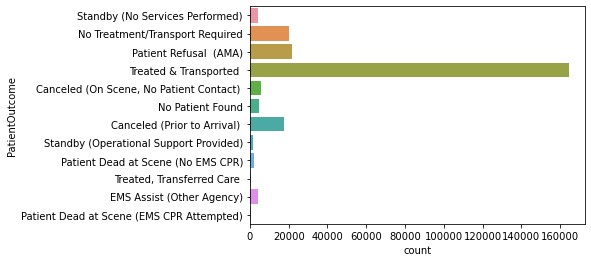

In [14]:
sns.countplot(y='PatientOutcome', data=df)
plt.show()

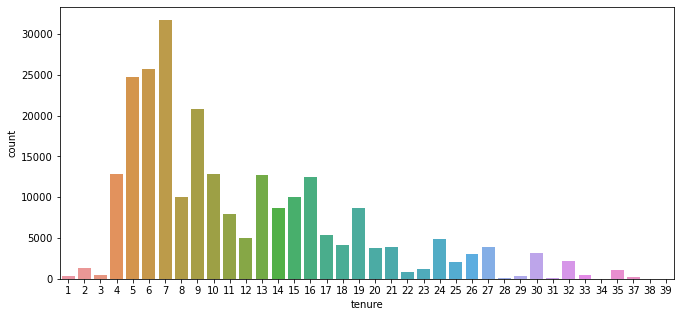

In [15]:
plt.figure(figsize=(11, 5))
sns.countplot(x ='tenure', data=df)
plt.show()

### bin year/tenure (range of values)

Senior Provider: 11+  
Middle Provider: 4-10   
Junior Provider: 0-3

In [17]:
bin_tenure = [0, 4, 11, 39]
tenure_range = ['0-3', '4-10', '11+']
df['tenure_bin'] = pd.cut(df['tenure'], bin_tenure, labels=tenure_range)
df.head()

,Shift,FireStation,FRDPersonnelStartDate,PatientOutcome,year,tenure,tenure_bin
0,A - Shift,4,1997-08-18,Standby (No Services Performed),1997,24,11+
1,A - Shift,1,2011-10-24,No Treatment/Transport Required,2011,10,4-10
2,B - Shift,19,2015-01-12,Patient Refusal (AMA),2015,6,4-10
3,A - Shift,35,2004-07-12,Treated & Transported,2004,17,11+
4,A - Shift,37,2012-09-24,Treated & Transported,2012,9,4-10


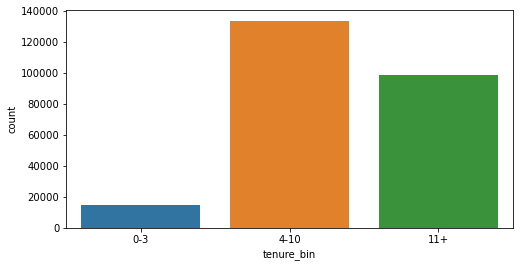

In [18]:
plt.figure(figsize=(8, 4))
sns.countplot(x='tenure_bin', data=df)
plt.show()

## 4. Correlation Analytics

### 4.1 Chi-Squared Test： 

In [19]:
contingenc_table = pd.crosstab(df['PatientOutcome'],
                              df['tenure_bin'],
                              margins = True)
f_obs = np.array([contingenc_table.iloc[0][0:3].values,
                  contingenc_table.iloc[1][0:3].values,
                  contingenc_table.iloc[2][0:3].values,
                  contingenc_table.iloc[3][0:3].values,
                  contingenc_table.iloc[4][0:3].values,
                  contingenc_table.iloc[5][0:3].values,
                  contingenc_table.iloc[6][0:3].values,
                  contingenc_table.iloc[7][0:3].values,
                  contingenc_table.iloc[8][0:3].values,
                  contingenc_table.iloc[9][0:3].values,
                  contingenc_table.iloc[10][0:3].values,
                  contingenc_table.iloc[11][0:3].values])
from scipy import stats
stats.chi2_contingency(f_obs)[0:3]

(449.89792479937586, 1.9348147339478234e-81, 22)

In [31]:
contingenc_table

tenure_bin,0-3,4-10,11+,All
PatientOutcome,,,,
"Canceled (On Scene, No Patient Contact)",330,2806,2388,5524
Canceled (Prior to Arrival),939,9024,7850,17813
EMS Assist (Other Agency),184,2267,1511,3962
No Patient Found,334,2500,1883,4717
No Treatment/Transport Required,1029,11900,7362,20291
Patient Dead at Scene (EMS CPR Attempted),42,292,196,530
Patient Dead at Scene (No EMS CPR),130,1154,836,2120
Patient Refusal (AMA),1329,11854,8359,21542
Standby (No Services Performed),281,2042,1666,3989


p value is close to zero（1.9348147339478234e-81）, which means that the possibility of irrelevance between EMS call outcome and provider tenure is extremely small.  
There is a relationship between the category of EMS call outcome and provider tenure  


### 4.2 Cramer's V

Measure the strength of association between categorical data. 
The coefficient ranges from 0 to 1.  
0 means that the two variables are no association, and 1 means strong association.  

In [20]:
X2 = stats.chi2_contingency(f_obs)[0]
n = np.sum(f_obs)
minDim = min(f_obs.shape)-1
V = np.sqrt((X2/n)/minDim)
print(V)

0.030177541108439013


### 4.3 One-Way ANOVA

In [21]:
df.groupby("PatientOutcome")["tenure"].count()

PatientOutcome
Canceled (On Scene, No Patient Contact)        5524
Canceled (Prior to Arrival)                   17813
EMS Assist (Other Agency)                      3962
No Patient Found                               4717
No Treatment/Transport Required               20291
Patient Dead at Scene (EMS CPR Attempted)       530
Patient Dead at Scene (No EMS CPR)             2120
Patient Refusal  (AMA)                        21542
Standby (No Services Performed)                3989
Standby (Operational Support Provided)         1358
Treated & Transported                        164472
Treated, Transferred Care                       693
Name: tenure, dtype: int64

In [22]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
model = ols("tenure ~ PatientOutcome", data=df).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
PatientOutcome,11.0,1.237377e+04,1124.888074,23.896999,5.995249e-50
Residual,246999.0,1.162683e+07,47.072358,NaN,NaN


PR:5.995249e-50 <0.05  
There is a relationship between the category of EMS call outcome and provider tenure